# Random Forest

The candidate with level 6.5 had a previous salary of 160000. In order to hire him in our new company, we would like to confirm if he is being honest about his last salary and we will can predict this using the Random Forest.

Agenda:

To be able to predict the salaries of the organisation and be able to decide the limit to be given.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data

In [2]:
data = pd.read_csv("Position_Salaries.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data.shape

(10, 3)

In [4]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## EDA

In [5]:
data.describe(include='all')

,Position,Level,Salary
count,10,10.00000,10.000000
unique,10,NaN,NaN
top,Manager,NaN,NaN
freq,1,NaN,NaN
mean,NaN,5.50000,249500.000000
std,NaN,3.02765,299373.883668
min,NaN,1.00000,45000.000000
25%,NaN,3.25000,65000.000000
50%,NaN,5.50000,130000.000000
75%,NaN,7.75000,275000.000000


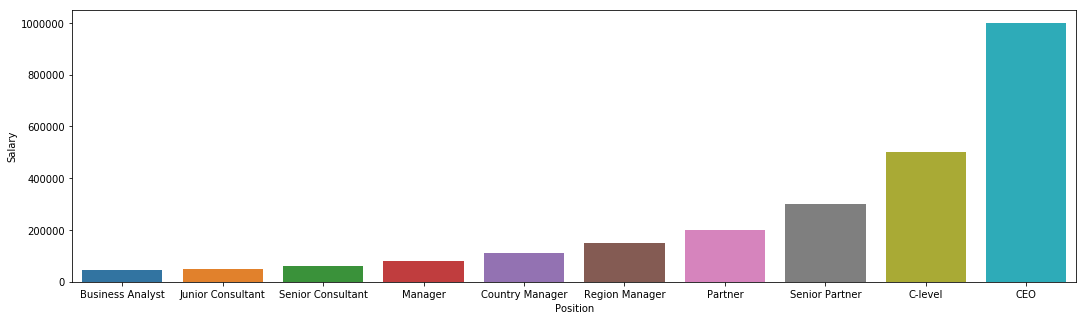

In [6]:
fig,ax = plt.subplots(figsize=(18,5))
sns.barplot(x='Position',y='Salary',data=data)

## Modelling

From the question, we can say that Level is our independent variable and Salary is our dependent variable

In [7]:
x = np.array(data['Level']).reshape(-1,1)
y = data['Salary']

In [8]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 11,max_depth =3,random_state=0)
rfr.fit(x,y)
rfr.score(x,y)

0.9573718920833953

## To see effect of n_estimators on score

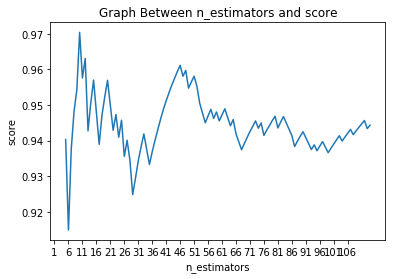

In [9]:
d = [i+5 for i in range(110)]
acc=[]
for i in d:
    dt = RandomForestRegressor(n_estimators = i,random_state=0)
    dt.fit(x,y)
    acc.append(dt.score(x,y))

plt.plot(d,acc)
plt.title("Graph Between n_estimators and score")
plt.xlabel("n_estimators")
plt.ylabel("score")
plt.xticks(np.arange(1,110,5))
plt.show()


As it can be seen, with n_estimators=11, we can achieve maximum score, which can be considered the optimum value.

## To see effect of max_depth on score

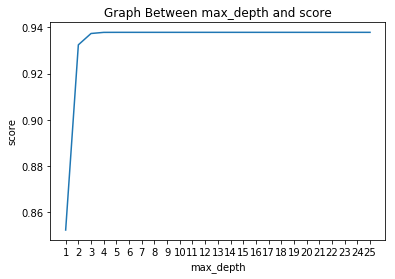

In [10]:
d = [i+1 for i in range(25)]
acc=[]
for i in d:
    dt = RandomForestRegressor(max_depth= i,random_state=0)
    dt.fit(x,y)
    acc.append(dt.score(x,y))

plt.plot(d,acc)
plt.title("Graph Between max_depth and score")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.xticks(np.arange(1,26,1))
plt.show()

After max_depth=3 , score almost remains same, so we can say that its the optimum value.

## Predicting

In [11]:
rfr.predict([[6.5]])

array([161666.66666667])

According to our predictions, the salary for level 6.5 shold be $161667

The employee said that the salary was $160000 in his previous office.

According to the analysis, he is being honest. 

The new company can pay him anywhere between 160000 =< Salary =< 161667 i.e. they can offer him a maximum increase  of $1667 on his previous salary.